<a href="https://colab.research.google.com/github/MariaJG/AGP2021/blob/main/PCQM4M_LSC_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCQM4M-LSC Dataset and Python package

# Download the PCQM4M-LSC dataset 

In [ ]:
!wget https://dgl-data.s3-accelerate.amazonaws.com/dataset/OGB-LSC/pcqm4m_kddcup2021.zip

--2021-04-26 18:28:06--  https://dgl-data.s3-accelerate.amazonaws.com/dataset/OGB-LSC/pcqm4m_kddcup2021.zip
Resolving dgl-data.s3-accelerate.amazonaws.com (dgl-data.s3-accelerate.amazonaws.com)... 52.222.139.131
Connecting to dgl-data.s3-accelerate.amazonaws.com (dgl-data.s3-accelerate.amazonaws.com)|52.222.139.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60233696 (57M) [application/zip]
Saving to: ‘pcqm4m_kddcup2021.zip’

pcqm4m_kddcup2021.z 100%[===================>]  57.44M  22.7MB/s    in 2.5s    

2021-04-26 18:28:09 (22.7 MB/s) - ‘pcqm4m_kddcup2021.zip’ saved [60233696/60233696]



# Read the zip file downloaded in the previous step

In [ ]:
import zipfile

# Path
zipfilename = "/content/pcqm4m_kddcup2021.zip"
password = None

# Open and extract all files in the zip
z = zipfile.ZipFile(zipfilename, "r")
try:
    z.extractall(pwd=password)
except:
    print('Error')
    pass
z.close()

# Decompress the zip file

In [ ]:
import gzip

def write_file(filename, data):
    """ This method creates a file with the data param give by the user """
    try:
        f = open(filename, "wb")
    except IOError as e:
        print(e.errno, e.message)
    else:
        f.write(data)
        f.close()

def decompress(filename):
    """ This method decompress a zip file """
    f = gzip.open(filename)
    write_file(filename[:filename.rfind(".gz")], f.read())
    f.close()

# Decompress the pcqm4m_kddcup2021 file
decompress("/content/pcqm4m_kddcup2021/raw/data.csv.gz")

# Read the Database raw contain in the file /content/pcqm4m_kddcup2021/raw/data.csv 

In [ ]:
import pandas as pd 
_df = pd.read_csv("/content/pcqm4m_kddcup2021/raw/data.csv")

# Convert the database into a dataframe

In [ ]:
_df

,idx,smiles,homolumogap
0,0,Cc1ccc(cc1)C1C=c2cnccc2=NC1=O,3.047675
1,1,COc1cc(OC)ccc1C=CN(C(=O)C)C,4.410966
2,2,C=CCN(C(=O)C)C=Cc1ccccc1C,4.639541
3,3,C=CCN(C(=O)C)C=Cc1ccccc1F,4.492600
4,4,C=CCN(C(=O)C)C=Cc1ccccc1Cl,4.612330
...,...,...,...
3803448,3803448,O=N(=O)c1ccc(c(c1)N(=O)=O)Cl,NaN
3803449,3803449,NCC(=O)COP(=O)(O)O,NaN
3803450,3803450,CC(CN)O,NaN
3803451,3803451,OC1C=CC=C(C1O)C(=O)O,NaN


# These step is to make fast test with the dataframe

In [ ]:
df = _df.iloc[0:1000, 0:2]
df

,idx,smiles
0,0,Cc1ccc(cc1)C1C=c2cnccc2=NC1=O
1,1,COc1cc(OC)ccc1C=CN(C(=O)C)C
2,2,C=CCN(C(=O)C)C=Cc1ccccc1C
3,3,C=CCN(C(=O)C)C=Cc1ccccc1F
4,4,C=CCN(C(=O)C)C=Cc1ccccc1Cl
...,...,...
995,995,OC(c1ccccc1)C(=O)CC(C)C
996,996,OC(C(OC(C)(C)C)(C#N)C)c1ccccc1
997,997,CCOC(=O)C=CCOCC=C
998,998,N#CC=Cc1ccccc1[N+]#[C-]


# Install the smiles python reader 

In [ ]:
# What is smiles? 
# https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation

!pip install pysmiles

  Using cached https://files.pythonhosted.org/packages/18/e0/1d4702dd81121d04a477c272d47ee5b6bc970d1a0990b11befa275c55cf2/pbr-5.6.0-py2.py3-none-any.whl
  Created wheel for pysmiles: filename=pysmiles-1.0.1-py2.py3-none-any.whl size=22017 sha256=8b46b3ba7f64c6d3ca9fe86c37cd3f192f8995159dcbf73187c3ba4265431741
  Stored in directory: /root/.cache/pip/wheels/2e/ba/9b/b96056ad3f356628ebc98a6da947d9a038f4b550c84316a2e2
Successfully built pysmiles


# Add molecule graph from reader smiles type in each value from the dataframe


In [ ]:
import logging
from pysmiles import read_smiles
import networkx as nx

# This is to read_smiles method do not full the
# console with unimportant messages
logging.getLogger('pysmiles').setLevel(logging.CRITICAL)

def add_mol(smiles):
  return read_smiles(smiles)

def add_mol_nodes(mol):
  return mol.nodes(data='element')

def add_mol_matrix(mol):
  return nx.to_numpy_matrix(mol)


In [ ]:
df["mol"] = df.apply(lambda x: add_mol(x.smiles), axis=1)
# df["mol_nodes"] = df.apply(lambda x: add_mol_nodes(x.mol), axis=1)
# df["mol_matrix"] = df.apply(lambda x: add_mol_matrix(x.mol), axis=1)

In [ ]:
df

,idx,smiles,mol
0,0,Cc1ccc(cc1)C1C=c2cnccc2=NC1=O,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,1,COc1cc(OC)ccc1C=CN(C(=O)C)C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,2,C=CCN(C(=O)C)C=Cc1ccccc1C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,3,C=CCN(C(=O)C)C=Cc1ccccc1F,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,4,C=CCN(C(=O)C)C=Cc1ccccc1Cl,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...
995,995,OC(c1ccccc1)C(=O)CC(C)C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)"
996,996,OC(C(OC(C)(C)C)(C#N)C)c1ccccc1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
997,997,CCOC(=O)C=CCOCC=C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)"
998,998,N#CC=Cc1ccccc1[N+]#[C-],"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)"


# Calculate the Hashimoto grahp

In [ ]:
# Matriz de retroceso 
# https://github.com/psuarezserrato/Coned-backtracking-distance-between-graphs
# def fast_hashimoto(graph, ordering='blocks', return_ordering=False):


In [ ]:
!wget https://raw.githubusercontent.com/psuarezserrato/Coned-backtracking-distance-between-graphs/master/sunbeam.py

--2021-04-26 18:28:26--  https://raw.githubusercontent.com/psuarezserrato/Coned-backtracking-distance-between-graphs/master/sunbeam.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13876 (14K) [text/plain]
Saving to: ‘sunbeam.py’

sunbeam.py          100%[===================>]  13.55K  --.-KB/s    in 0s      

2021-04-26 18:28:26 (104 MB/s) - ‘sunbeam.py’ saved [13876/13876]



In [ ]:
!python /content/sunbeam.py

In [ ]:
import sunbeam
import networkx as nx
from pysmiles import read_smiles

def calculate_hashimoto_matrix(graph):
  hashimoto =  sunbeam.fast_hashimoto(graph, ordering='blocks', return_ordering=False)
  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.toarray.html
  return hashimoto.toarray()


In [ ]:
df["hashimoto_matrix"] = df.apply(lambda x: calculate_hashimoto_matrix(x.mol), axis=1)

In [ ]:
df.head(5)

,idx,smiles,mol,hashimoto_matrix
0,0,Cc1ccc(cc1)C1C=c2cnccc2=NC1=O,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,COc1cc(OC)ccc1C=CN(C(=O)C)C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,C=CCN(C(=O)C)C=Cc1ccccc1C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,C=CCN(C(=O)C)C=Cc1ccccc1F,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,C=CCN(C(=O)C)C=Cc1ccccc1Cl,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Gershgorin circle theorem

In [ ]:
import numpy as np
import sympy as sym

def circle_theorem(M):
    # https://colab.research.google.com/drive/1n6_KT-r0jG8A3DOGqJfn0qrNEKQC1P3R?usp=sharing
    x = sym.Symbol('x') 
    y = sym.Symbol('y')

    circles = set()
    for i in range(M.shape[0]):
        # Selecionamos la fila i con i corriendo
        row = M[i: i + 1, :]
        row = np.delete(row, i)
        radio = np.absolute(row)
        radio = np.sum(radio)
        circles.add(sym.ConditionSet((x,y), sym.simplify((x - np.real(M[i,i]))**2 + (y - np.imag(M[i,i]))**2) <= radio))
    return sym.Union(*(e for e in circles))

In [ ]:
df["circle_theorem"] = df.apply(lambda x: circle_theorem(x.hashimoto_matrix), axis=1)

In [ ]:
df.head(5)

,idx,smiles,mol,hashimoto_matrix,circle_theorem
0,0,Cc1ccc(cc1)C1C=c2cnccc2=NC1=O,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","Union(ConditionSet((x, y), x**2 + y**2 <= 0.0)..."
1,1,COc1cc(OC)ccc1C=CN(C(=O)C)C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","Union(ConditionSet((x, y), x**2 + y**2 <= 0.0)..."
2,2,C=CCN(C(=O)C)C=Cc1ccccc1C,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","Union(ConditionSet((x, y), x**2 + y**2 <= 0.0)..."
3,3,C=CCN(C(=O)C)C=Cc1ccccc1F,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","Union(ConditionSet((x, y), x**2 + y**2 <= 0.0)..."
4,4,C=CCN(C(=O)C)C=Cc1ccccc1Cl,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","Union(ConditionSet((x, y), x**2 + y**2 <= 0.0)..."


------------


# BONUS
## PLOT A MOLECULE

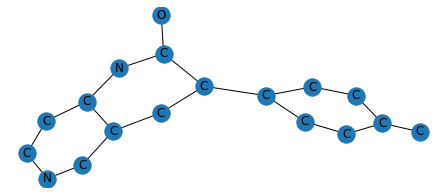

In [ ]:
import matplotlib.pyplot as plt
# Select a molecule from the data frame
mol = df["mol"][0]
elements = nx.get_node_attributes(mol, name="element")
nx.draw(mol, with_labels=True, labels=elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

------------
